In [1]:
import numpy as np
from astropy.io import fits

# Create dummy data to simulate JWST f090w image (downsampled version)
data = np.random.poisson(lam=100.0, size=(1024, 1024)).astype(np.float32)

# Add a few bright fake sources
for i in range(10):
    x, y = np.random.randint(0, 1024, size=2)
    data[y-3:y+3, x-3:x+3] += np.random.randint(500, 1500)

# Write to FITS file
hdu = fits.PrimaryHDU(data)
hdu.writeto("small_f090w.fits", overwrite=True)

print("Dummy small_f090w.fits created!")


Dummy small_f090w.fits created!


Number of sources detected: 10


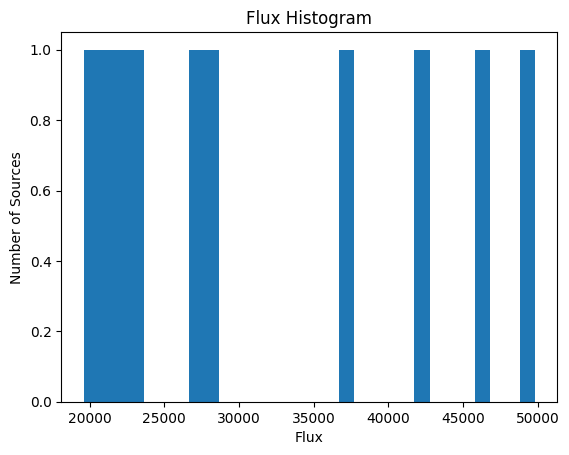

Mean flux: 31778.1716796875
Median flux: 27630.142578125
Standard deviation of fluxes: 10664.853113818268
Largest flux: 49814.578125
Located at x=539.5008564987505, y=295.5018711093151
This is 1.69 standard deviations above the mean.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sep
from astropy.io import fits
from astropy.visualization import simple_norm

# Load the small f090w FITS file you just created
with fits.open("small_f090w.fits") as hdul:
    data = hdul[0].data.astype(np.float32)

# Background subtraction
bkg = sep.Background(data)
data_sub = data - bkg.back()

# Extract sources
sep.set_extract_pixstack(1000000)  # Increase buffer for safety
objects = sep.extract(data_sub, thresh=3.0, err=bkg.globalrms)

print(f"Number of sources detected: {len(objects)}")

# Histogram of fluxes
fluxes = objects['flux']
plt.hist(fluxes, bins=30)
plt.xlabel("Flux")
plt.ylabel("Number of Sources")
plt.title("Flux Histogram")
plt.show()

# Compute mean, median, std
mean_flux = np.mean(fluxes)
median_flux = np.median(fluxes)
std_flux = np.std(fluxes)

print(f"Mean flux: {mean_flux}")
print(f"Median flux: {median_flux}")
print(f"Standard deviation of fluxes: {std_flux}")

# Find largest outlier
max_flux = np.max(fluxes)
max_flux_index = np.argmax(fluxes)
max_flux_obj = objects[max_flux_index]

sigma_away = (max_flux - mean_flux) / std_flux
print(f"Largest flux: {max_flux}")
print(f"Located at x={max_flux_obj['x']}, y={max_flux_obj['y']}")
print(f"This is {sigma_away:.2f} standard deviations above the mean.")
